In [180]:
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.collections import EllipseCollection

# mpl.rcParams['figure.dpi'] = 300

In [181]:
NY = 5
NX = 5
NL = 8

cxs = [1, 0, -1,  0, 1, -1, -1,  1]
cys = [0, 1,  0, -1, 1,  1, -1, -1]

In [187]:
lattice = np.zeros((NY, NX, NL))

# lattice = np.random.rand(NY, NX, NL)
lattice[NY//2, NX//2] = 0.1

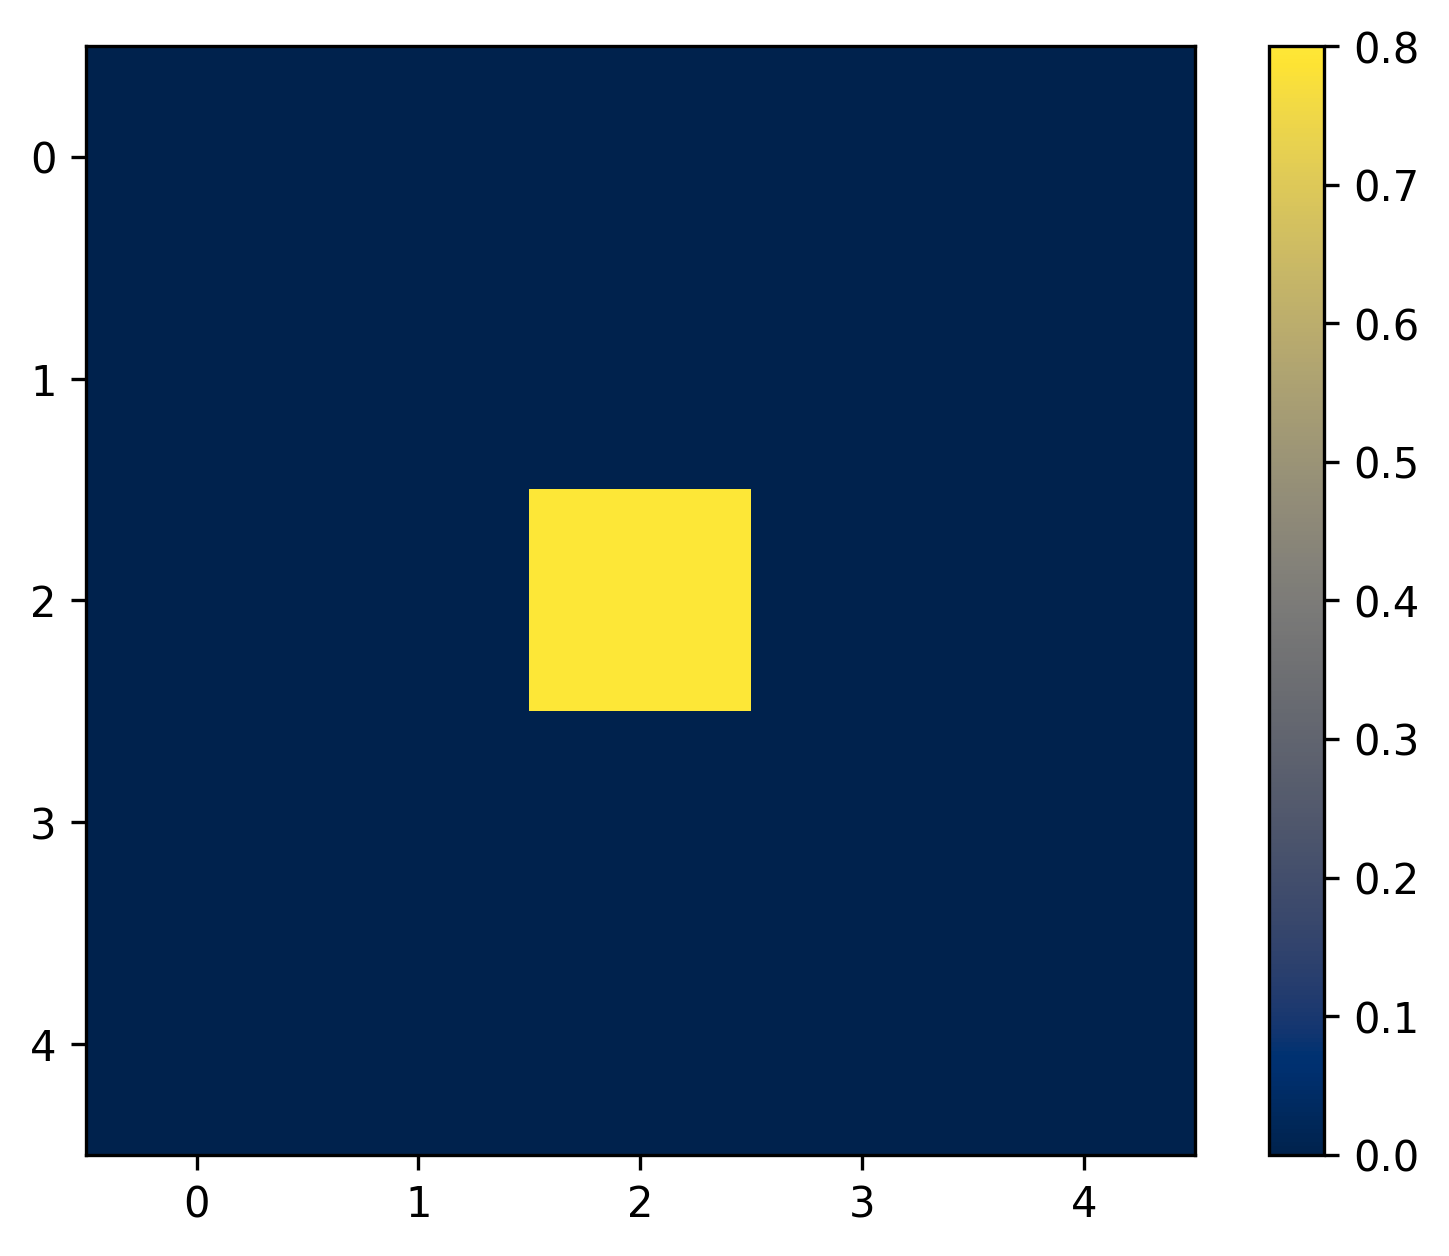

In [188]:
fig, ax = plt.subplots()
plt.imshow(np.sum(lattice, axis=2), cmap="cividis")
plt.colorbar()

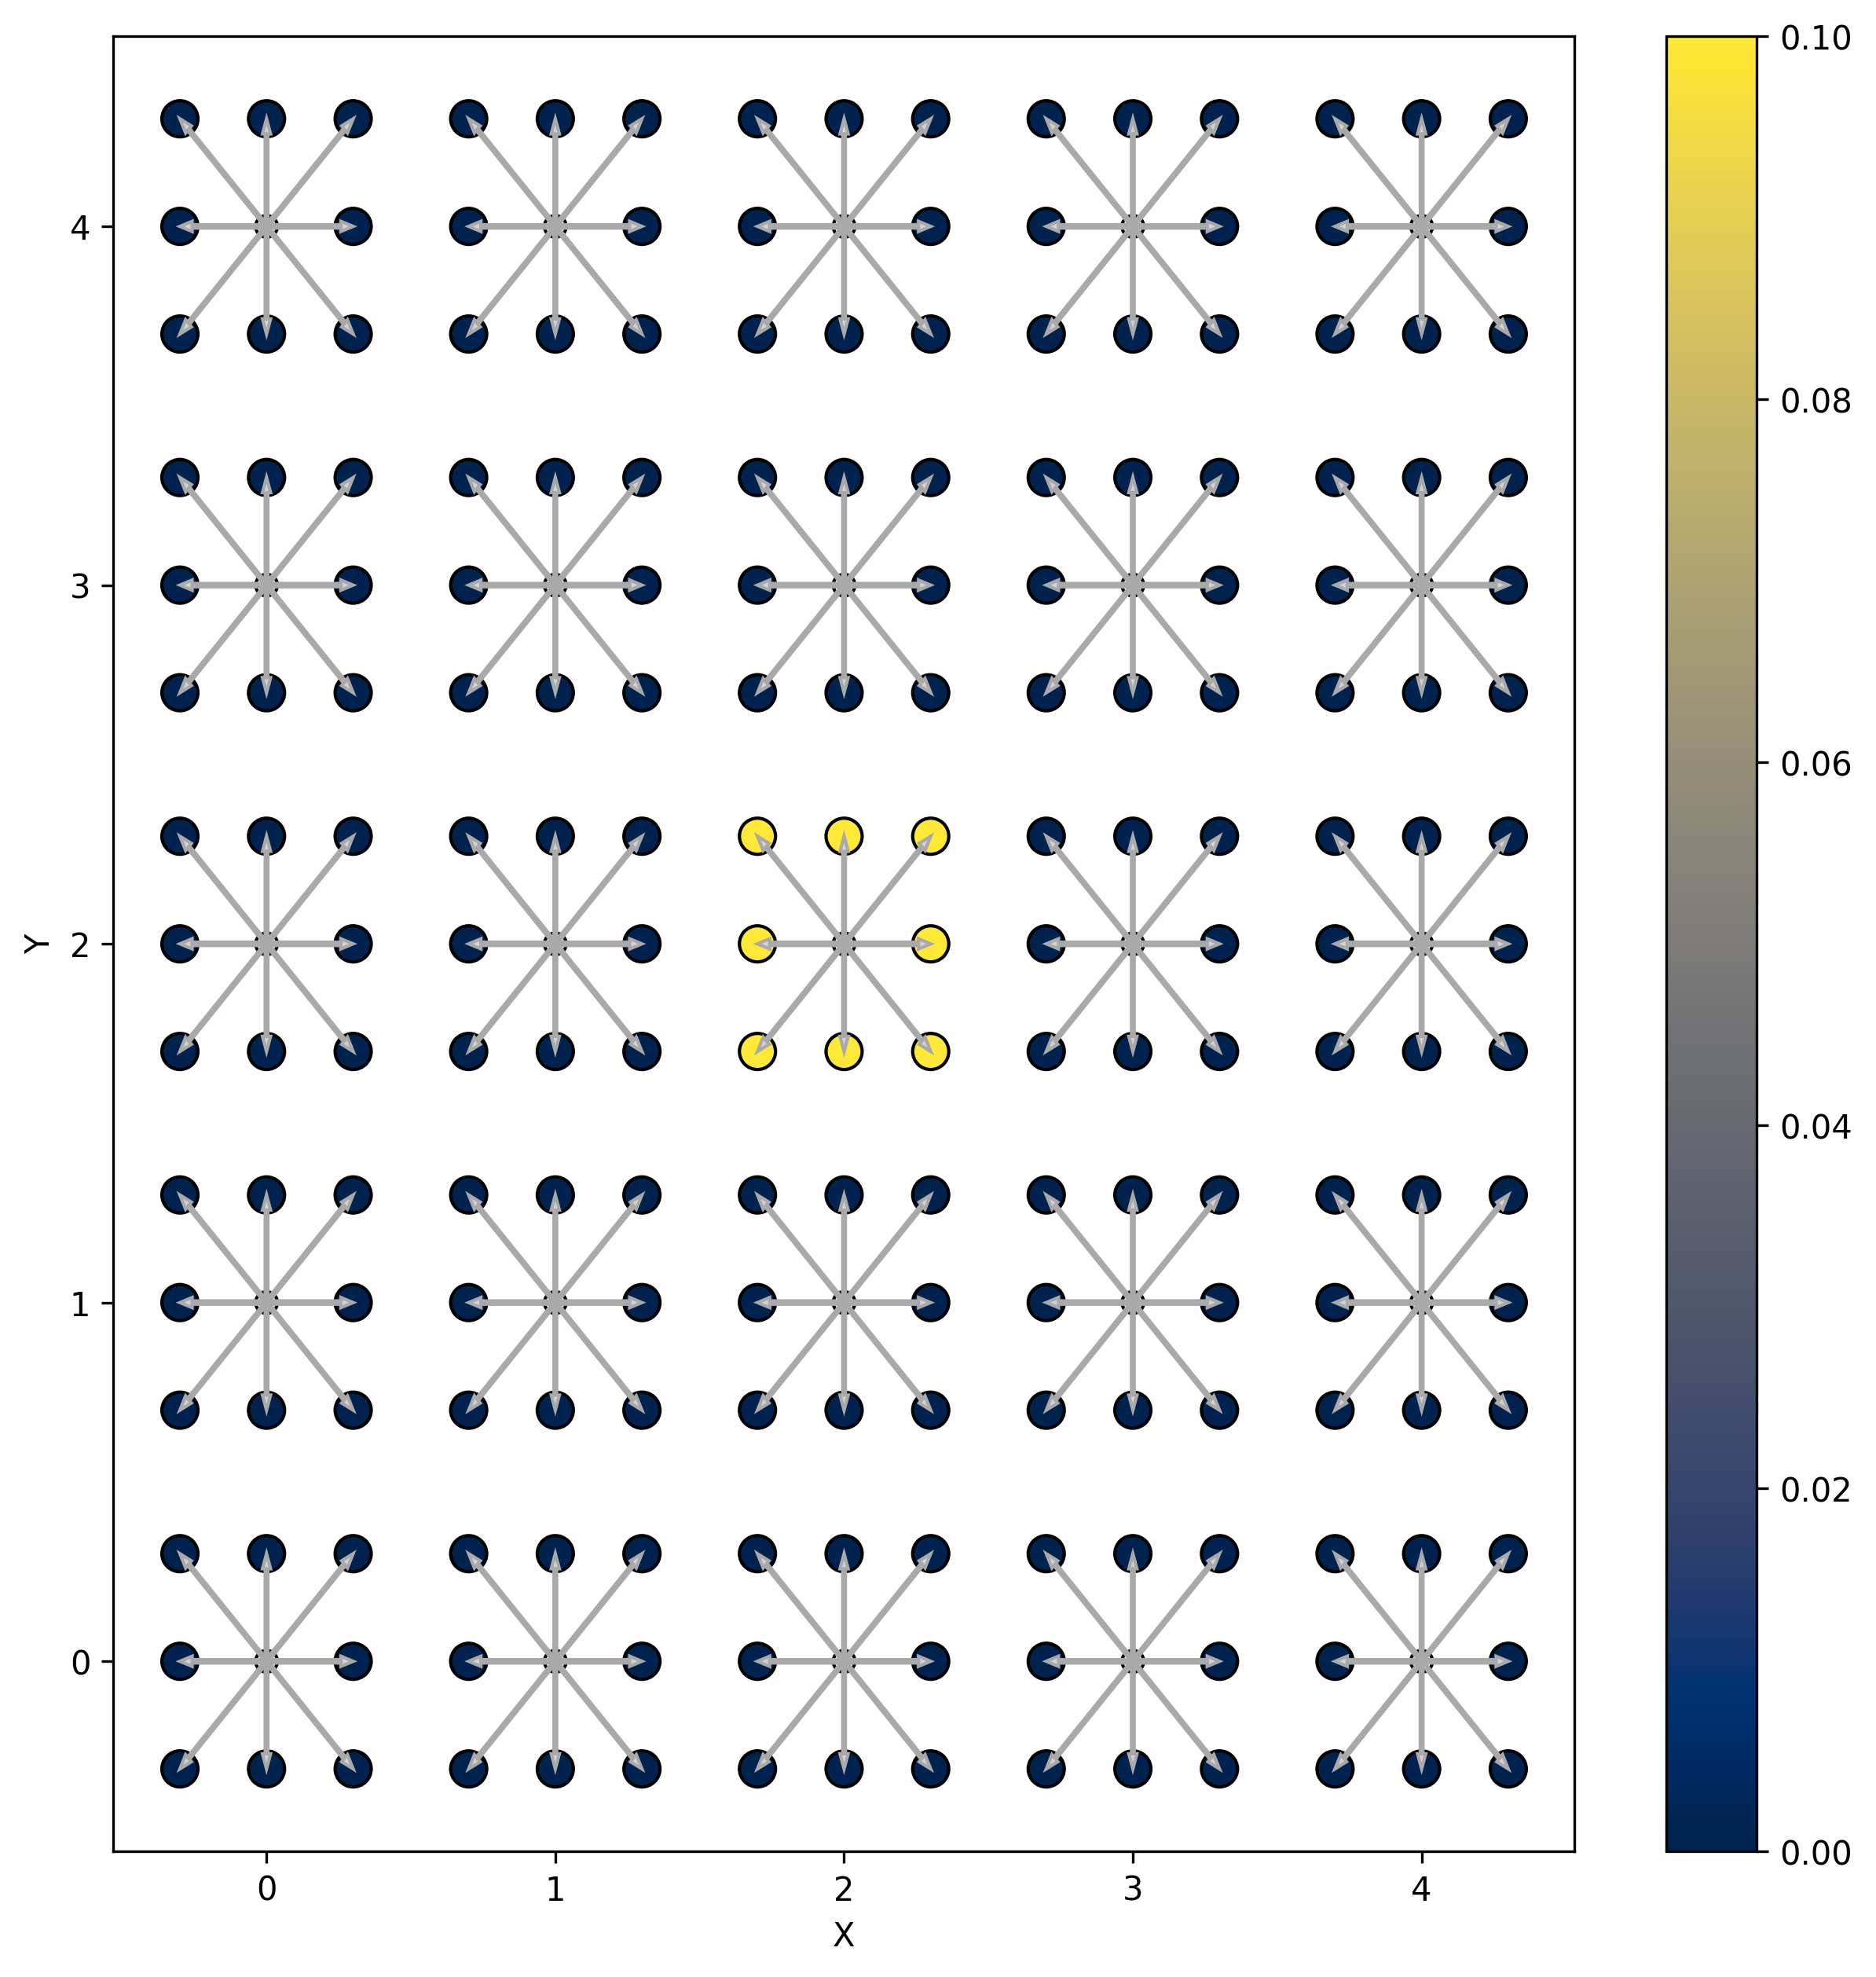

In [237]:
fig, ax = plt.subplots(figsize=(10, 10))

NY, NX, NL = lattice.shape

x = np.arange(NX)
y = np.arange(NY)
X, Y = np.meshgrid(x, y)

XY = np.column_stack((X.ravel(), Y.ravel()))
cxcy = np.column_stack((cxs, cys))

# print(XY)
# print(cxcy)

widths = [0.075, *([0.125] * NL)]
heights = [0.075, *([0.125] * NL)]
angles = 0

rel_spacing = 0.30

norm = mpl.colors.Normalize(vmin=0, vmax=np.max(lattice))
cmap = mpl.cm.cividis

m = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

for xy in XY:
    lattice_val = lattice[xy[1], xy[0]]
    # print(xy, lattice_val)
    # print(m.to_rgba(lattice_val))
    
    offsets_local = rel_spacing * cxcy
    offsets_global = np.concatenate(([[0, 0]], offsets_local)) + xy

    facecolors = m.to_rgba(lattice_val)
    facecolors = np.concatenate(([[0, 0, 0, 0]], facecolors))

    facecolors = m.to_rgba(lattice_val)
    facecolors = np.concatenate(([[0, 0, 0, 0]], facecolors))
    
    ec = EllipseCollection(widths, heights, angles, offsets=offsets_global,
                           units='x', offset_transform=ax.transData,
                           edgecolors="black", facecolors=facecolors)

    ax.add_collection(ec)

    for dir_i in range(NL):
        plt.arrow(*xy, *offsets_local[dir_i], width=widths[1] * 0.075, edgecolor="darkgray", facecolor="lightgray", length_includes_head=True)

ax.autoscale_view()

ax.set_xlabel('X')
ax.set_ylabel('Y')

ax.set_xticks(x)
ax.set_yticks(y)

plt.colorbar(m, ax=ax)

plt.show()